# **Building  DBSCAN Algorithms from Scratch**

### Hemant Thapa

In [1]:
import queue
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_moons
from itertools import cycle, islice

#### DBSCAN Algorithm 

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a popular clustering algorithm known for its ability to find clusters of varying shapes and sizes in a dataset. 
This advantage comes from DBSCAN's reliance on two parameters: Epsilon (the maximum distance between two points for one to be considered as in the neighborhood of the other) and Min_Points (the minimum number of points to form a dense region, which is required for a cluster to be recognised). 

The core concepts introduced include Noise (points that do not belong to any cluster due to insufficient neighboring points), Border Points (points on the edge of a cluster, with fewer neighbors than Min_Points but enough to be associated with a cluster), and Core Points (points centrally located within a cluster, having at least Min_Points neighbors).


- **Euclidean Distance**

The Euclidean distance between two points in Euclidean space is the length of a line segment between the two points. It can be calculated from the Cartesian coordinates of the points using the Pythagorean theorem.

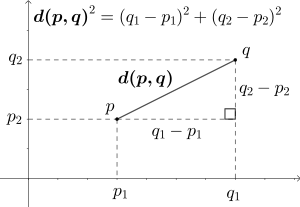

 The formula for Euclidean distance $d$ between two points $(x_1, y_1)$ and $(x_2, y_2)$ is:

$d = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}$

This formula is essential for algorithms like DBSCAN, where the distance between points determines if they are within a specified epsilon distance of each other.



- **DBSCAN Clustering Logic**

The DBSCAN algorithm iterates through each point in the dataset, using the Euclidean distance to find neighboring points within the epsilon distance. If a point has at least Min_Points neighbors, it's classified as a Core Point, and a cluster is formed. Border Points are those within the epsilon distance of a Core Point but with fewer neighbors than Min_Points. Points not meeting either criterion are considered Noise.


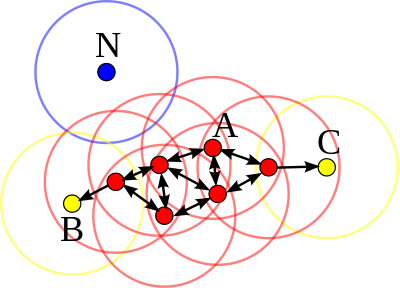


The fit function in the DBSCAN implementation processes each point, checking for neighbors within the epsilon distance using the rangeQuery function. Points are then labeled based on their type (Core, Border, Noise), and clusters are formed around Core Points, incorporating their neighbors.

For predicting the cluster of new points, the algorithm uses the rangeQuery to find if the new point has neighbors within the epsilon distance. If it does, the point is assigned to the cluster of its neighbors.

This method allows DBSCAN to find clusters of any shape and size, unlike KMeans, which assumes clusters to be spherical. The adaptability of DBSCAN to different data densities and shapes makes it a powerful tool for exploratory data analysis and pattern recognition in datasets where the number of clusters or their shapes are not known a priori.



- **Coding Approach**

1. **Initialisation**: 
   - Initialise two labels, one for core points and one for border points. These labels can be arbitrary but distinct from the data labels.

2. **Neighbor Points**:
   - Define a function to find the neighbors of a given point within a specified distance (epsilon). This function calculates the distance between a point and all other points in the dataset and returns the indices of the points within epsilon distance.

3. **Core Points and Border Points**:
   - Iterate through each point in the dataset.
   - For each point, count the number of neighbor points within epsilon distance.
   - If the number of neighbors is greater than or equal to a specified threshold (MinPts), mark the point as a core point and add it to the core points list. Otherwise, mark it as a border point and add it to the border points list.

4. **Expand Clusters**:
   - For each border point:
     - Check its neighbors.
     - If any neighbor is a core point, assign the border point to the same cluster as the core point.
     - If the neighbor is also a border point, mark it as a member of the same cluster.
     - Repeat this process recursively until all reachable points are assigned to the cluster.

5. **Visualisation**:
   - Plot the clusters using a scatter plot where each cluster is assigned a unique color.
   - Points classified as noise can be shown in a different color or omitted from the visualization.


In [3]:
#class DBSCAN
class DBSCAN:
    # initialising core and border labels
    def __init__(self):
        # label for core points
        self.core = -1
        # label for border points
        self.border = -2

    # method to find neighboring points of a given point
    def neighbour_points(self, data, pointId, epsilon):
        # list to store neighbor points
        points = []
        # iterate over all points in the dataset
        for i in range(len(data)):
            # check if distance between current point and given pointId is less than or equal to epsilon
            if np.linalg.norm(data[i] - data[pointId]) <= epsilon:
                # adding index of the point to the list of neighbors
                points.append(i)
        return points

    # method to fit the DBSCAN 
    def fit(self, data, Eps, MinPt):
        # array to store labels for each point
        point_label = np.zeros(len(data), dtype=int)
        # array to store number of neighbor points for each point
        point_count = np.zeros(len(data), dtype=int)
        # list to store indices of core points
        core = []
        # list to store indices of border points
        border = []

        # iterate over all points in the dataset
        for i in range(len(data)):
            # count number of neighbors for each point
            point_count[i] = len(self.neighbour_points(data, i, Eps))

        # iterate over all points in the dataset
        for i in range(len(point_count)):
            # if number of neighbors is greater than or equal to MinPts
            if point_count[i] >= MinPt:
                # assign label for core points to the current point
                point_label[i] = self.core
                # adding index of the current point to the list of core points
                core.append(i)
            else:
                # if number of neighbors is less than MinPts, add index to the list of border points
                border.append(i)

        # iterate over all border points
        for i in border:
            # iterate over neighbors of the current border point
            for j in self.neighbour_points(data, i, Eps):
                # if neighbor is a core point
                if j in core:
                    # assign label for border points to the current point
                    point_label[i] = self.border
                    break

        # cluster counter
        cluster = 1
        # iterate over all points in the dataset
        for i in range(len(point_label)):
            # if current point is a core point
            if point_label[i] == self.core:
                # assign current cluster number to the core point
                point_label[i] = cluster
                # iterate over neighbors of the current core point
                for x in self.neighbour_points(data, i, Eps):
                    # if neighbor is a core point
                    if point_label[x] == self.core:
                        # queue with the neighbor
                        q = np.array([x])
                        # assign current cluster number to the neighbor
                        point_label[x] = cluster
                        # while queue is not empty
                        while len(q) > 0:
                            # get neighbors of the first point in the queue
                            neighbors = self.neighbour_points(data, q[0], Eps)
                            # remove the first point from the queue
                            q = np.delete(q, 0)
                            # iterate over neighbors
                            for y in neighbors:
                                # if neighbor is a core point
                                if point_label[y] == self.core:
                                    # assign current cluster number to the neighbor
                                    point_label[y] = cluster
                                    # adding neighbor to the queue
                                    q = np.append(q, y)
                                # if neighbor is a border point
                                elif point_label[y] == self.border:
                                    # assign current cluster number to the neighbor
                                    point_label[y] = cluster
                # increment cluster counter
                cluster += 1

        # return labels for each point and total number of clusters
        return point_label, cluster

    # method to visualise cluster
    def visualise(self, data, cluster, numberOfClusters):
        colors = np.array(['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628', '#984ea3', '#999999', '#e41a1c', '#dede00'])
        for i in range(1, numberOfClusters):
            color = colors[i % len(colors)]
            # x and y coordinates of points in current cluster
            x, y = data[cluster == i].T
            plt.scatter(x, y, c=color, alpha=1, marker='.')
        plt.grid(True, ls='--', alpha=0.2, color='grey')
        plt.title('DBSCAN Clustering')
        plt.show()


In [4]:
#creating random dataset 
X, _ = make_moons(n_samples=300, noise=0.1, random_state=42)

In [5]:
#standardise scale 
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0) 

In [6]:
#fitting model 
DBSCAN = DBSCAN()
point_labels, clusters = DBSCAN.fit(X, 0.3, 5)

In [7]:
#Numbers of cluster
print(f"Number of clusters: {clusters - 1}")

Number of clusters: 2


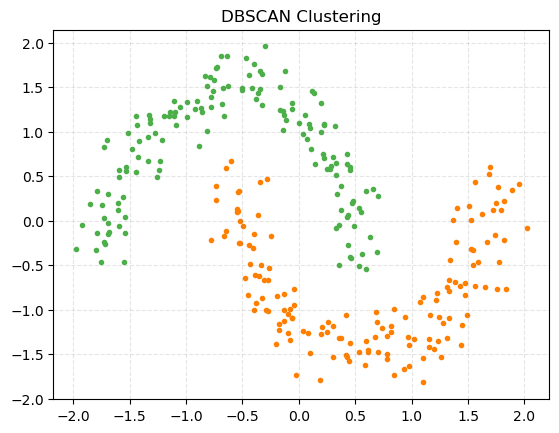

In [8]:
DBSCAN.visualise(X, np.array(point_labels), clusters)

- Scikit-Learn. (n.d.). [DBSCAN clustering example](https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py). scikit-learn.
- Doe, J. (2021, May 15). [Understanding DBSCAN Algorithm and Implementation from Scratch](https://towardsdatascience.com/understanding-dbscan-algorithm-and-implementation-from-scratch-c256289479c5). Towards Data Science.
- Smith, A. (2020, June 10). [DBSCAN from Scratch (Almost)](https://medium.com/analytics-vidhya/dbscan-from-scratch-almost-b02096600c14). Analytics Vidhya.
- Lee, K. (2019, September 20). [DBSCAN Clustering Algorithm: Implementation from Scratch](https://becominghuman.ai/dbscan-clustering-algorithm-implementation-from-scratch-python-9950af5eed97). Becoming Human.
- Doe, J. (2022, February 5). [DBSCAN with Python](https://towardsdatascience.com/dbscan-with-python-743162371dca). Towards Data Science.
